## Titanic Data Exploration

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
LogFare     891 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 130.5+ KB


In [3]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Fare Skewness
We see that Fare is a highly right-skewed variable, so we perform a log-transform.

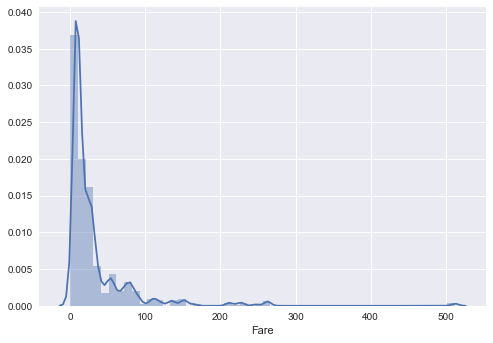

4.7792532923723545

In [67]:
from scipy.stats import skew
plt.figure(1)
sns.distplot(train['Fare'])
plt.show()
skew(train['Fare'])

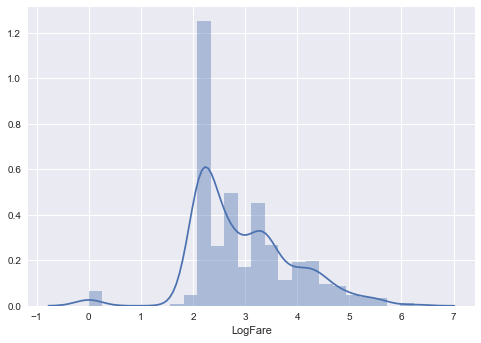

0.39426283638993376

In [74]:
train['LogFare'] = train['Fare'].add(1).apply(np.log)
plt.figure(2)
sns.distplot(train['LogFare'])
plt.show()
skew(train['LogFare'])

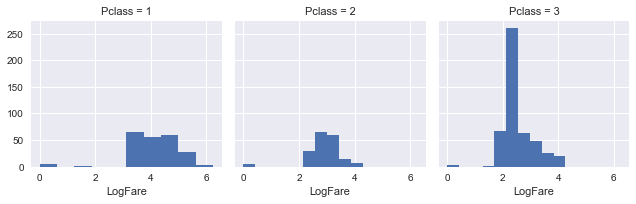

Pclass
1   -1.573204
2   -1.854674
3    0.581644
Name: LogFare, dtype: float64

In [75]:
plt.figure(3)
g = sns.FacetGrid(train, col='Pclass')
g = g.map(plt.hist, 'LogFare')
plt.show()
train.groupby('Pclass')['LogFare'].apply(skew)

In [21]:
train[train['Cabin'] == 'B28']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


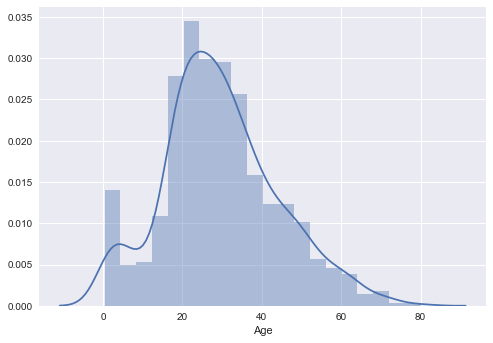

0.3882898514698657

In [78]:
plt.figure(4)
sns.distplot(train['Age'].dropna())
plt.show()
skew(train['Age'].dropna())